# Salary prediction using simple linear regression and polynomial regression

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ds=pd.read_csv('Salary.csv')

In [3]:
ds

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


Extracting both the columns into different variables x and y

In [4]:
x=ds.iloc[:,:1].values
#x (to display independent vaiable row(experience))

In [5]:
y=ds.iloc[:,1:].values
#y(dependent varaible i.e salary)

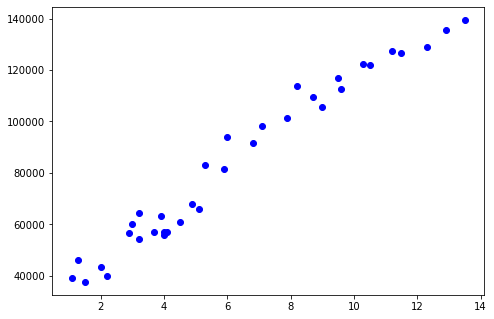

In [6]:
fig=plt.figure()              #creates a new figure
ax=fig.add_axes([0,0,1,1])    #adds axes to the figure
ax.scatter(x,y,color='b')    #scatter y vs x with given colour

# Train and Test

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression 

In [9]:
linear_regressor=LinearRegression()

# linear regression training

In [10]:
linear_regressor.fit(x_train,y_train)

LinearRegression()

# Prediction and testing

In [11]:
y_pred=linear_regressor.predict(x_test)
y_pred

array([[120057.87672477],
       [ 88127.64484315],
       [ 73456.99776241],
       [118331.91824468],
       [ 97620.41648363],
       [ 71731.03928232],
       [ 63101.24688189]])

In [12]:
y_test

array([[121872],
       [ 91738],
       [ 66029],
       [122391],
       [101302],
       [ 67938],
       [ 63218]], dtype=int64)

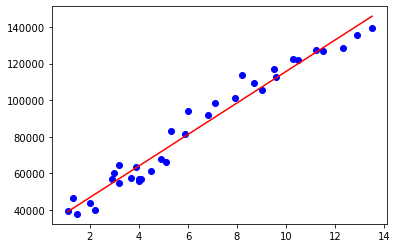

In [13]:
plt.scatter(x,y,color='b')
plt.plot(x,linear_regressor.predict(x),color='red')

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
#coverting independent variable into polynomial data
poly=PolynomialFeatures(degree=2)#two varaibles
x_poly=poly.fit_transform(x)

In [16]:
poly_regressor=LinearRegression()
poly_regressor.fit(x_poly,y)

LinearRegression()

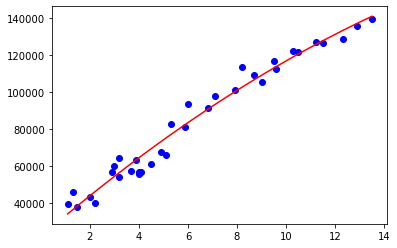

In [17]:
plt.scatter(x,y,color='b')
plt.plot(x,poly_regressor.predict(poly.fit_transform(x)),color='red')

In [18]:
y_pred1=poly_regressor.predict(poly.fit_transform(x))
y_pred1 #predicted values

array([[ 34222.96719981],
       [ 36421.1693715 ],
       [ 38603.85950911],
       [ 43992.71970409],
       [ 46121.11772245],
       [ 53448.35351841],
       [ 54479.58945519],
       [ 56530.42730319],
       [ 56530.42730319],
       [ 61589.65677413],
       [ 63586.20250289],
       [ 64578.65835449],
       [ 64578.65835449],
       [ 65567.23619757],
       [ 69482.76748471],
       [ 73336.25063557],
       [ 75239.72415989],
       [ 77127.68565014],
       [ 82698.49791645],
       [ 83613.39359769],
       [ 90792.95074096],
       [ 93421.29752913],
       [100259.58992282],
       [102759.9624299 ],
       [106849.68977135],
       [109256.990074  ],
       [113191.59707473],
       [113966.88444932],
       [119285.31183296],
       [120769.96043733],
       [125844.07328434],
       [127960.52294814],
       [133433.75634349],
       [137375.80503225],
       [141178.24541436]])

In [19]:
y #actual values

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872],
       [127345],
       [126756],
       [128765],
       [135675],
       [139465]], dtype=int64)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear regression model evaluation
mae_linear = mean_absolute_error(y_test, y_pred)  # Corrected: use y_pred from linear regression
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

# Print evaluation results
print("Linear Regression Evaluation:")
print(f"Mean Absolute Error: {mae_linear:.4f}")
print(f"Mean Squared Error: {mse_linear:.4f}")
print(f"R² Score: {r2_linear:.4f}\n")



Linear Regression Evaluation:
Mean Absolute Error: 3500.4191
Mean Squared Error: 16561691.2210
R² Score: 0.9708



In [21]:
y_pred_poly = poly_regressor.predict(poly.transform(x_test))
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print evaluation results for Polynomial Regression
print("Polynomial Regression Evaluation:")
print(f"Mean Absolute Error: {mae_poly:.4f}")
print(f"Mean Squared Error: {mse_poly:.4f}")
print(f"R² Score: {r2_poly:.4f}")

Polynomial Regression Evaluation:
Mean Absolute Error: 3024.6235
Mean Squared Error: 18136235.6595
R² Score: 0.9680


# --------------------------------------------THE END------------------------------------------------------